<a href="https://colab.research.google.com/github/IrinaFab/Bank-MK/blob/main/irina_BankMK_PCA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Marketing Bank Dataset EDA

#### The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

#### [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

#### Available at:

[pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001\n",
        
[bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt"

#### STANDARDIZE THE DATA
* Use StandardScaler to standardize the numeric data.
 
#### PRINCIPAL COMPONENT ANALYSIS
* Calculate the Principal Components for your numeric data.
*  Use a Scree Plot (or some other approach) to determine the appropriate number of Principal Components. Choose a value of at least 2.
* Convert your Principal Component data set into a Data Frame
* Reduce the size of your Data Frame to the number of PC's that you decided upon
* Name the columns PC_1, PC_2, etc.
* Append the Targets Variables and the Categorical Variables

* **Interpret the PRINCIPAL COMPONENTS**
* Select at least one of the principal components, print it's weight values
* Coefficients interpretation

* **Plot the PRINCIPAL COMPONENTS**
* Create a scatter plot with PC_1 as the X-Axis and PC_2 as the Y_Axis.
* Using one of the categorical variables (or the Target), color the dots in the scatter plot.
  - Note whether or not the Principal Components predict the categorical variables.
  - If you selected more than 2 PC's, feel free to experiment by using different PC's and determining if they predict the target.

In [ ]:
# Import libraries
## Basic libraries
import pandas as pd
import numpy as np
import warnings
from pandas._libs import index

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingRegressor   
from sklearn.ensemble import GradientBoostingClassifier 

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

Mounting Google Drive to Colab Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Loading data


###Input variables:

* bank client data 

  1. age (numeric)
  2. job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed','services','student', 'technician', 'unemployed', 'unknown')
  3. marital : marital status (categorical: 'divorced', 'married', 'single','unknown'; note: 'divorced' means divorced or widowed)
  4. education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
  5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
  6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
  7. loan: has personal loan? (categorical: 'no','yes','unknown')

* related with the last contact of the current campaign
  8. contact: contact communication type (categorical: 'cellular', 'telephone') 
  9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
  10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
  11. duration: last contact duration, in seconds (numeric)  
### Note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). The duration is not known before a call is performed. Also, after the end of the call, y IS known. Thus, this input should only be included for benchmark purposes and discarded if the intention is to have a realistic predictive model.

* other attributes  
  12. campaign: number of contacts performed during this campaign and for this client (numeric: includes last contact)
  13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric: 999 means client was not previously contacted) 
  14. previous: number of contacts performed before this campaign and for this client (numeric) 
  15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

* social and economic context attributes
  16. emp.var.rate: employment variation rate - quarterly indicator (numeric)  
  17. cons.price.idx: consumer price index - monthly indicator (numeric)     
  18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19. euribor3m: euribor 3 month-rate - daily indicator (numeric: computed by the European Central Bank (ECB) and published by Thomson Reuters, i.e., a publicly available and widely used index)
  20. nr.employed: number of employees - quarterly indicator (numeric)

* Output variable (desired target):
  21. y: has the client subscribed a term deposit? (binary: 'yes','no')

According to the dataset documentation, we need to remove the 'duration' column because in real-case the duration is only known after the label column is known. This problem can be considered to be 'data leakage' where predictors include data that will not be available at the time you make predictions.

In [ ]:
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

# data = pd.read_csv('/content/drive/MyDrive/bank.csv')

In [ ]:
data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,56,57,37,40,56,45,59,41,24,25,41,25,29,57,35
job,housemaid,services,services,admin.,services,services,admin.,blue-collar,technician,services,blue-collar,services,blue-collar,housemaid,blue-collar
marital,married,married,married,married,married,married,married,married,single,single,married,single,single,divorced,married
education,basic.4y,high.school,high.school,basic.6y,high.school,basic.9y,professional.course,unknown,professional.course,high.school,unknown,high.school,high.school,basic.4y,basic.6y
default,no,unknown,no,no,no,unknown,no,unknown,no,no,unknown,no,no,no,no
housing,no,no,yes,no,no,no,no,no,yes,yes,no,yes,no,yes,yes
loan,no,no,no,no,yes,no,no,no,no,no,no,no,yes,no,no
contact,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may,may,may,may,may,may,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon,mon


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
print('Shape of dataframe:', data.shape)

Shape of dataframe: (41188, 21)


In [ ]:
# displaying the data types and store into a variable
dt = data.dtypes
dt

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
# seting up categorical variables and targets

AGE = 'age'
JOB = 'job'
MARITAL = 'marital'
EDUCATION = 'education'
DEFAULT = 'default'
HOUSING = 'housing'
LOAN = 'loan'
CONTACT = 'contact'
MONTH = 'month'
DAY_OF_WEEK = 'day_of_week'
POUTCOME = 'poutcome'
TARGET = 'y'

In [ ]:
# standard scaler requires numeric variables
# making a copy of df, droping the target and categorical variables, 

X = data.copy()
X = X.drop([TARGET, AGE, JOB, MARITAL, EDUCATION, DEFAULT, HOUSING, LOAN, CONTACT, MONTH, DAY_OF_WEEK, POUTCOME], axis = 1)
X.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
X.dtypes

duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
# storing the column names into a varNames list

varNames = X.columns
varNames

Index(['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
# creating a data frame of dtypes
dt = data.dtypes

# storing the integers and floats into a list numList
numList = []

# Looping through index and storing in numList. Remove
for i in dt.index:
    #if i in ([TARGET]) : continue
    if dt[i] in (['int64', 'float64']) : numList.append(i)
        
print('NUMBERS')
print('------')
for i in numList:
    print(i)

NUMBERS
------
age
duration
campaign
pdays
previous
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed


## Standardizing the dataset (must be done before PCA)

Notes: Array that stores the scaled and transformed X_df data: X_STD

* Standardize the data (i.e., substract mean, divide by SD, +/- 3)
* This method rescales variables---end up with rescaled variables within a similar range between -3 and 3


In [ ]:
theScaler = StandardScaler()
theScaler.fit(X)

StandardScaler()

In [ ]:
X_STD = theScaler.transform(X)
X_STD = pd.DataFrame(theScaler.transform(X))
X_STD.head()

,0,1,2,3,4,5,6,7,8
0,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


In [ ]:
# confirming the number of variables for PCA (the number of PCs is equal to the number of variables)
MAX_N = X_STD.shape[1]
MAX_N

9

In [ ]:
# Verifying
X_STD.columns = varNames
print('Inspecting data:\n', X_STD.head().T, '\n')

Inspecting data:
                        0         1         2         3         4
duration        0.010471 -0.421501 -0.124520 -0.413787  0.187888
campaign       -0.565922 -0.565922 -0.565922 -0.565922 -0.565922
pdays           0.195414  0.195414  0.195414  0.195414  0.195414
previous       -0.349494 -0.349494 -0.349494 -0.349494 -0.349494
emp.var.rate    0.648092  0.648092  0.648092  0.648092  0.648092
cons.price.idx  0.722722  0.722722  0.722722  0.722722  0.722722
cons.conf.idx   0.886447  0.886447  0.886447  0.886447  0.886447
euribor3m       0.712460  0.712460  0.712460  0.712460  0.712460
nr.employed     0.331680  0.331680  0.331680  0.331680  0.331680 



In [ ]:
print('Summarizing data:\n', X_STD.describe().T)

Summarizing data:
                   count          mean       std       min       25%       50%  \
duration        41188.0 -1.397348e-17  1.000012 -0.996177 -0.602774 -0.301937   
campaign        41188.0 -7.590531e-17  1.000012 -0.565922 -0.565922 -0.204909   
pdays           41188.0 -2.580781e-16  1.000012 -5.149443  0.195414  0.195414   
previous        41188.0  5.520386e-18  1.000012 -0.349494 -0.349494 -0.349494   
emp.var.rate    41188.0  7.797546e-17  1.000012 -2.216433 -1.197935  0.648092   
cons.price.idx  41188.0 -3.315820e-14  1.000012 -2.374889 -0.864955  0.299457   
cons.conf.idx   41188.0 -1.352495e-16  1.000012 -2.224953 -0.474791 -0.280328   
euribor3m       41188.0  0.000000e+00  1.000012 -1.722351 -1.312994  0.712460   
nr.employed     41188.0 -1.024860e-14  1.000012 -2.815697 -0.940281  0.331680   

                     75%        max  
duration        0.234171  17.972019  
campaign        0.156105  19.289818  
pdays           0.195414   0.195414  
previous       -0.

##PCA 
1.   A dimensionality-reduction method that is often used to reduce the 
dimensionality of large data sets by transforming a large set into a smaller one, PRINCIPAL COMPONENTS.
2.   Often, highly correlated variables in a dataset result in bias results, so performing PCA helps to reduce the number of variables without lossing information. Therefore, PCA saves time and makes data processing less convoluted.
3.   This is a projection of the initial data set that still contains most of the information in the large set. Before starting the projection into lower-dimmension hyperplane, we need to choose the hyperplane that preserves the maximum variance which ensures minimum loss of information.
4.   First principal component has the most information and last principal component has the least information, hence, the advantage to use the first principal components without loss of information.

In [ ]:
 # creating 9 PCs (as there are 9 variables)
pca = PCA(n_components = MAX_N)
pca.fit(X_STD)

PCA(n_components=9)

In [ ]:
X_STD.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


In [ ]:
# Inspecting eigenvalues = how much information is in each PC
eigenval = pca.explained_variance_
print('Eigen Values:')
print(eigenval)

Eigen Values:
[3.89558314 1.33639288 1.05468887 0.98460462 0.88187076 0.425663
 0.38591625 0.02489284 0.01060615]


PC1 has 3.89 information...PC2...PC3...so we may keep the first three only

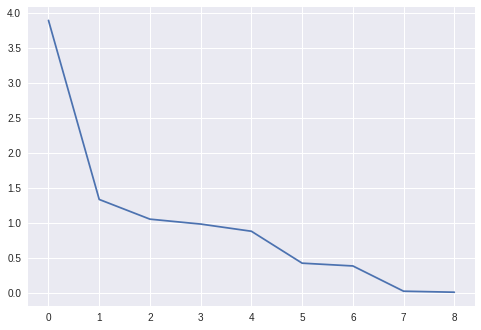

In [ ]:
plt.plot(eigenval)

In [ ]:
# Identifying relevant PCs for analysis
varPCT = []
totPCT = []
total = 0

for i in eigenval:
  total = total + i
  VAR = int(i / len(eigenval) * 100)
  PCT = int(total / len(eigenval) * 100)
  varPCT.append(VAR)
  totPCT.append(PCT)
  print(round(i, 2), 'variation=', VAR, '%', 'total=', PCT, '%')

3.9 variation= 43 % total= 43 %
1.34 variation= 14 % total= 58 %
1.05 variation= 11 % total= 69 %
0.98 variation= 10 % total= 80 %
0.88 variation= 9 % total= 90 %
0.43 variation= 4 % total= 95 %
0.39 variation= 4 % total= 99 %
0.02 variation= 0 % total= 99 %
0.01 variation= 0 % total= 100 %


The table shows:
* PC1 contains 39% of the information. 
* PC2 contains 13% of the information. Combined with PC1, there is a total of 58% of the infomation. 
* PC3 contains 11% of the information. Combined with PC1 and PC2, there is a total of 69% of the infomation.
* ....

We may decide to keep the first 5 PCs as we will have 90% of the information.

## SCREE Plot (visualize eigenvalues and PCs)

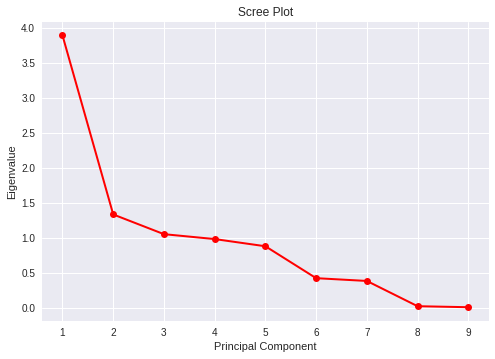

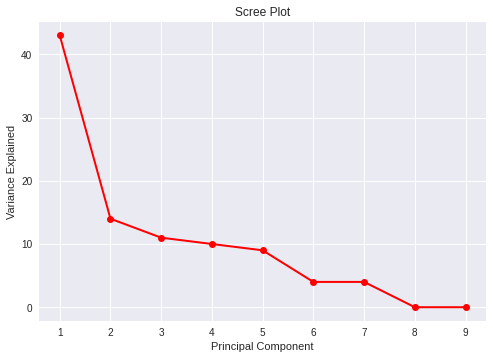

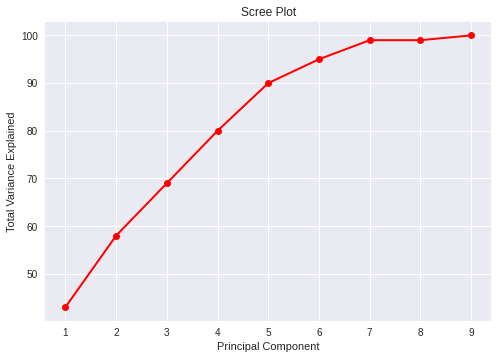

In [ ]:
# Notes: arange will give you 0-10(MAX_N of PCs); +1 will give 0-11 but capture 10th PCs

PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM , eigenval, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM, varPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


PC_NUM = np.arange(MAX_N) + 1
plt.plot(PC_NUM, totPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Total Variance Explained')
plt.show()

### Converting PC dataset (eigenval) into a DataFrame

In [ ]:
dfc = pd.DataFrame(pca.components_)
dfc.columns = list(X.columns)
dfc.T

,0,1,2,3,4,5,6,7,8
duration,0.025565,0.092965,0.688011,0.556045,0.453213,-0.037382,0.036824,0.001293,-0.001382
campaign,-0.100493,-0.004231,-0.675694,0.296163,0.667280,-0.005312,0.015229,-0.000031,0.009272
pdays,-0.227514,-0.662919,0.091189,-0.082974,0.077478,0.228974,0.659650,-0.002346,-0.000763
previous,0.305800,0.506762,-0.136094,0.149201,-0.173018,-0.186508,0.737445,0.018224,-0.004253
emp.var.rate,-0.488006,0.175831,0.002399,0.060323,-0.094459,-0.070003,0.047886,-0.793926,-0.284349
cons.price.idx,-0.366100,0.309287,-0.058248,0.268070,-0.223872,0.733494,-0.000997,0.311380,-0.099835
cons.conf.idx,-0.101645,0.381136,0.195821,-0.704517,0.498477,0.167359,0.115749,0.070520,-0.121881
euribor3m,-0.490386,0.152200,0.037101,-0.038439,-0.032660,-0.216708,0.054094,0.063565,0.823715
nr.employed,-0.470088,-0.008129,0.011025,0.025182,-0.069353,-0.541733,0.028817,0.513197,-0.464446


The PC1 will be 0.025 of the duration, -0.1 from campaign...,

In [ ]:
X_STD.head()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


In [ ]:
# Generating PC values; take X_STD and transform it into PC values
X_PCA = pca.transform(X_STD) 

# Creating PC dataframe
X_PCA = pd.DataFrame(X_PCA)

In [ ]:
print(X_STD.shape)
print(X_PCA.shape)

(41188, 9)
(41188, 9)


In [ ]:
# Inspecting dataframe; Read PCs row-wise PC0, PC1, PC2.....
X_PCA.head()

,0,1,2,3,4,5,6,7,8
0,-1.270459,0.477794,0.618110,-0.640857,-0.124688,0.411565,0.043956,-0.018276,0.064414
1,-1.281502,0.437636,0.320909,-0.881053,-0.320463,0.427713,0.028049,-0.018834,0.065011
2,-1.273910,0.465245,0.525235,-0.715918,-0.185867,0.416611,0.038985,-0.018450,0.064600
3,-1.281305,0.438353,0.326216,-0.876763,-0.316967,0.427424,0.028333,-0.018824,0.065000
4,-1.265924,0.494288,0.740175,-0.542205,-0.044280,0.404933,0.050489,-0.018046,0.064169


In [ ]:
# Another way of viewing PCs via slicing
X_PCA = X_PCA.iloc[:,:]
X_PCA

,0,1,2,3,4,5,6,7,8
0,-1.270459,0.477794,0.618110,-0.640857,-0.124688,0.411565,0.043956,-0.018276,0.064414
1,-1.281502,0.437636,0.320909,-0.881053,-0.320463,0.427713,0.028049,-0.018834,0.065011
2,-1.273910,0.465245,0.525235,-0.715918,-0.185867,0.416611,0.038985,-0.018450,0.064600
3,-1.281305,0.438353,0.326216,-0.876763,-0.316967,0.427424,0.028333,-0.018824,0.065000
4,-1.265924,0.494288,0.740175,-0.542205,-0.044280,0.404933,0.050489,-0.018046,0.064169
...,...,...,...,...,...,...,...,...,...
41183,1.809651,-0.825518,0.004791,1.986847,-1.424348,3.141347,-0.584328,-0.465208,0.351448
41184,1.814483,-0.807949,0.134816,2.091932,-1.338696,3.134282,-0.577368,-0.464964,0.351187
41185,1.759075,-0.879036,-0.623913,1.782798,-1.436910,3.160335,-0.599424,-0.465942,0.355568
41186,1.820300,-0.786794,0.291378,2.218464,-1.235564,3.125776,-0.568989,-0.464670,0.350873


In [ ]:
# naming the PCs 
colNames = X_PCA.columns
pcaNames = []

# looping through the list
for i in colNames:
  index = int(i) +1  # convert into int and Python starts at 0, but I want to start PC at 1
  theName = 'PC_' + str(index) # put PC prefix and turn into strings
  pcaNames.append(theName)

# appending list of pcaNames to X_PCA.columns
X_PCA.columns = pcaNames
X_PCA.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9
0,-1.270459,0.477794,0.618110,-0.640857,-0.124688,0.411565,0.043956,-0.018276,0.064414
1,-1.281502,0.437636,0.320909,-0.881053,-0.320463,0.427713,0.028049,-0.018834,0.065011
2,-1.273910,0.465245,0.525235,-0.715918,-0.185867,0.416611,0.038985,-0.018450,0.064600
3,-1.281305,0.438353,0.326216,-0.876763,-0.316967,0.427424,0.028333,-0.018824,0.065000
4,-1.265924,0.494288,0.740175,-0.542205,-0.044280,0.404933,0.050489,-0.018046,0.064169


In [ ]:
# appending the targets and categorical variables to X_PCA

url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

X_PCA['TARGET'] = data.y
X_PCA['AGE'] = data.age
X_PCA['JOB'] = data.job
X_PCA['MARITAL'] = data.marital
X_PCA['EDUCATION'] = data.education
X_PCA['DEFAULT'] = data.default
X_PCA['HOUSING'] = data.housing
X_PCA['LOAN'] = data.loan
X_PCA['CONTACT'] = data.contact
X_PCA['MONTH'] = data.month
X_PCA['DAY_OF_WEEK'] = data.day_of_week
X_PCA['POUTCOME'] = data.poutcome

In [ ]:
X_PCA.head().T

,0,1,2,3,4
PC_1,-1.270459,-1.281502,-1.27391,-1.281305,-1.265924
PC_2,0.477794,0.437636,0.465245,0.438353,0.494288
PC_3,0.61811,0.320909,0.525235,0.326216,0.740175
PC_4,-0.640857,-0.881053,-0.715918,-0.876763,-0.542205
PC_5,-0.124688,-0.320463,-0.185867,-0.316967,-0.04428
PC_6,0.411565,0.427713,0.416611,0.427424,0.404933
PC_7,0.043956,0.028049,0.038985,0.028333,0.050489
PC_8,-0.018276,-0.018834,-0.01845,-0.018824,-0.018046
PC_9,0.064414,0.065011,0.0646,0.065,0.064169
TARGET,no,no,no,no,no


In [ ]:
for Name, Group in X_PCA.groupby('TARGET'):
    print(Group.head() )

       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7  \
0 -1.270459  0.477794  0.618110 -0.640857 -0.124688  0.411565  0.043956   
1 -1.281502  0.437636  0.320909 -0.881053 -0.320463  0.427713  0.028049   
2 -1.273910  0.465245  0.525235 -0.715918 -0.185867  0.416611  0.038985   
3 -1.281305  0.438353  0.326216 -0.876763 -0.316967  0.427424  0.028333   
4 -1.265924  0.494288  0.740175 -0.542205 -0.044280  0.404933  0.050489   

       PC_8      PC_9 TARGET  ...        JOB  MARITAL    EDUCATION  DEFAULT  \
0 -0.018276  0.064414     no  ...  housemaid  married     basic.4y       no   
1 -0.018834  0.065011     no  ...   services  married  high.school  unknown   
2 -0.018450  0.064600     no  ...   services  married  high.school       no   
3 -0.018824  0.065000     no  ...     admin.  married     basic.6y       no   
4 -0.018046  0.064169     no  ...   services  married  high.school       no   

  HOUSING LOAN    CONTACT MONTH DAY_OF_WEEK     POUTCOME  
0      no   no 

### Creating a scatter plot with PC_1 as X-Axis and PC_2 as Y-Axis and selecting a categorical variable or target 

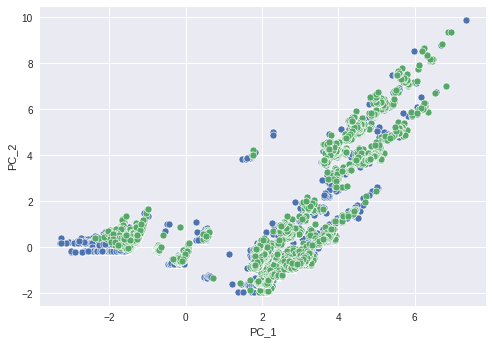

In [ ]:
for Name, Group in X_PCA.groupby('TARGET'):
  sns.scatterplot(x = Group.PC_1, y = Group.PC_2)

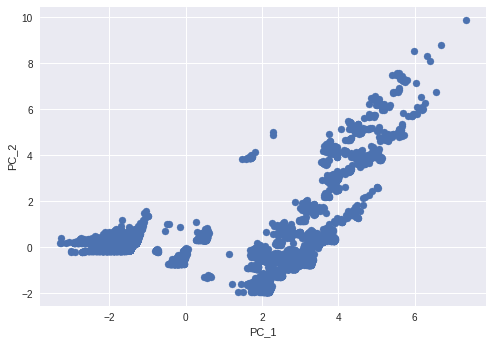

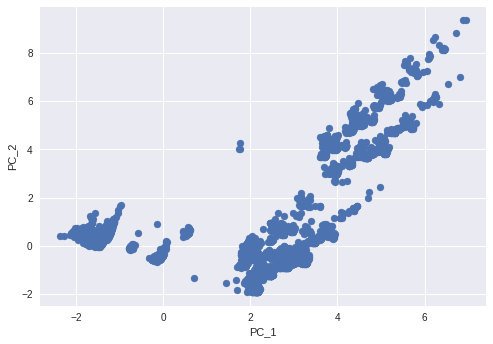

In [ ]:
for Name, Group in X_PCA.groupby('TARGET'):
  plt.scatter(x = Group.PC_1, y = Group.PC_2)
  plt.xlabel('PC_1')
  plt.ylabel('PC_2')
  plt.legend() 
  plt.show()

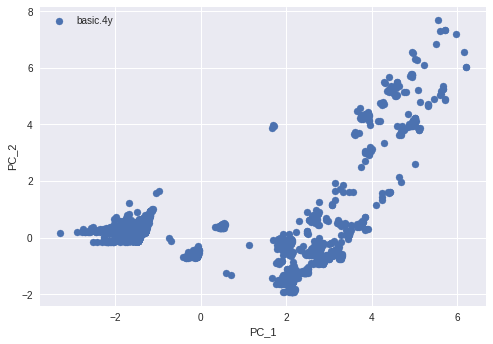

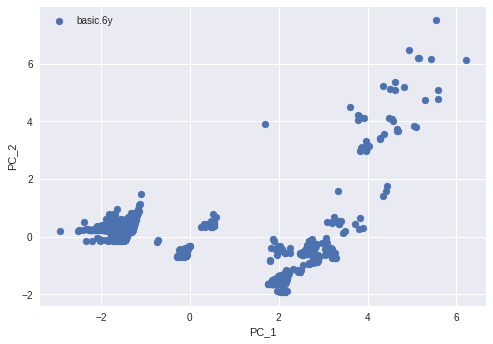

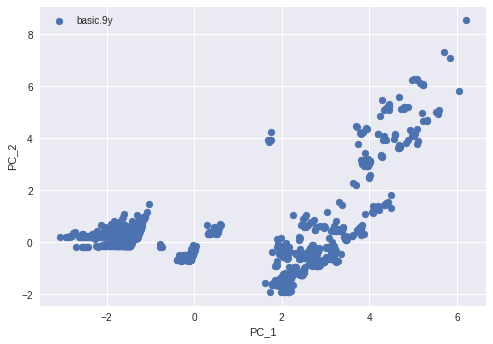

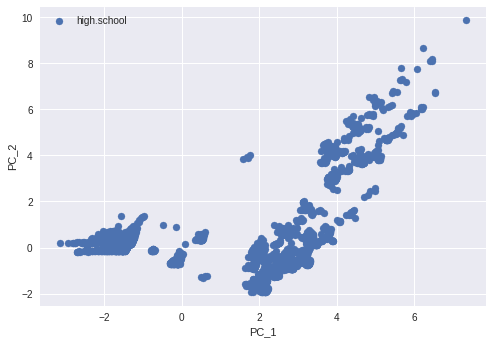

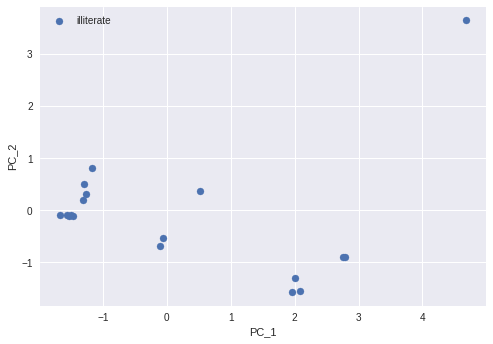

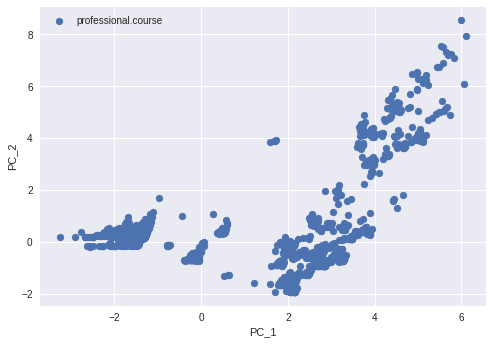

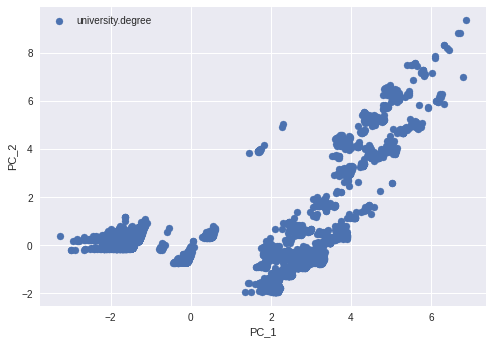

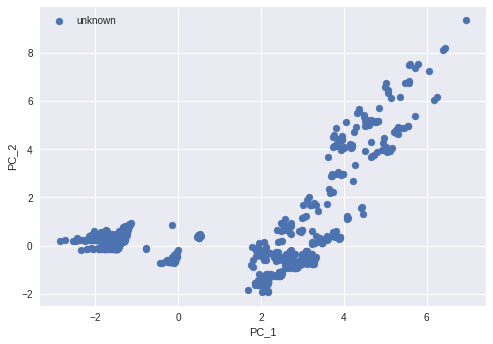

In [ ]:
for Name, Group in X_PCA.groupby(['EDUCATION']):
  plt.scatter(Group.PC_1, Group.PC_2, label=Name)
  plt.xlabel('PC_1')
  plt.ylabel('PC_2')
  plt.legend()
  plt.show()

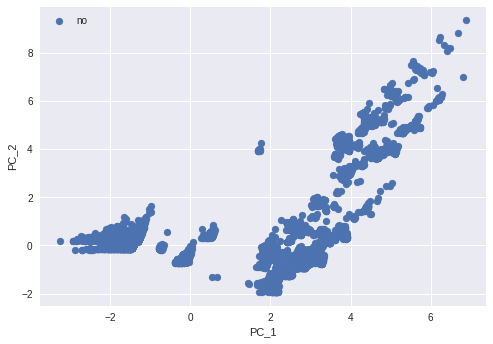

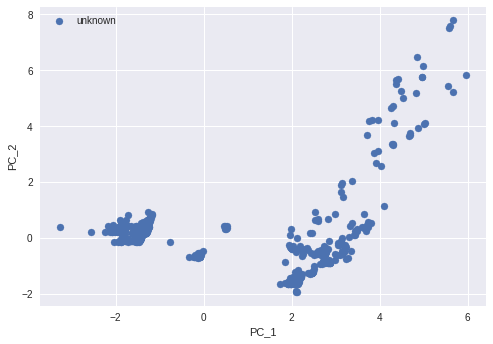

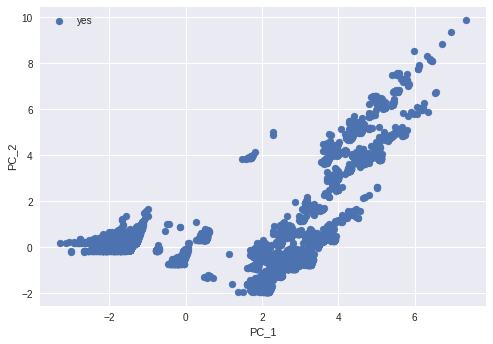

In [ ]:
for Name, Group in X_PCA.groupby(['HOUSING']):
  plt.scatter(Group.PC_1, Group.PC_2, label=Name)
  plt.xlabel('PC_1')
  plt.ylabel('PC_2')
  plt.legend()
  plt.show()

In [ ]:
print(X_STD.shape)
print(X_PCA.shape)

(41188, 9)
(41188, 21)


## Heat map of the first 5 PCs and categ var

In [ ]:
principal5 = pd.DataFrame(data = X_PCA, columns=['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5'])

In [ ]:
principal5.head()

,PC_1,PC_2,PC_3,PC_4,PC_5
0,-1.270459,0.477794,0.618110,-0.640857,-0.124688
1,-1.281502,0.437636,0.320909,-0.881053,-0.320463
2,-1.273910,0.465245,0.525235,-0.715918,-0.185867
3,-1.281305,0.438353,0.326216,-0.876763,-0.316967
4,-1.265924,0.494288,0.740175,-0.542205,-0.044280


In [ ]:
# Concatenation of dataframes
df_PC5 = pd.concat([principal5, X], axis=1)

In [ ]:
df_PC5.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-1.270459,0.477794,0.618110,-0.640857,-0.124688,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,-1.281502,0.437636,0.320909,-0.881053,-0.320463,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,-1.273910,0.465245,0.525235,-0.715918,-0.185867,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,-1.281305,0.438353,0.326216,-0.876763,-0.316967,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,-1.265924,0.494288,0.740175,-0.542205,-0.044280,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


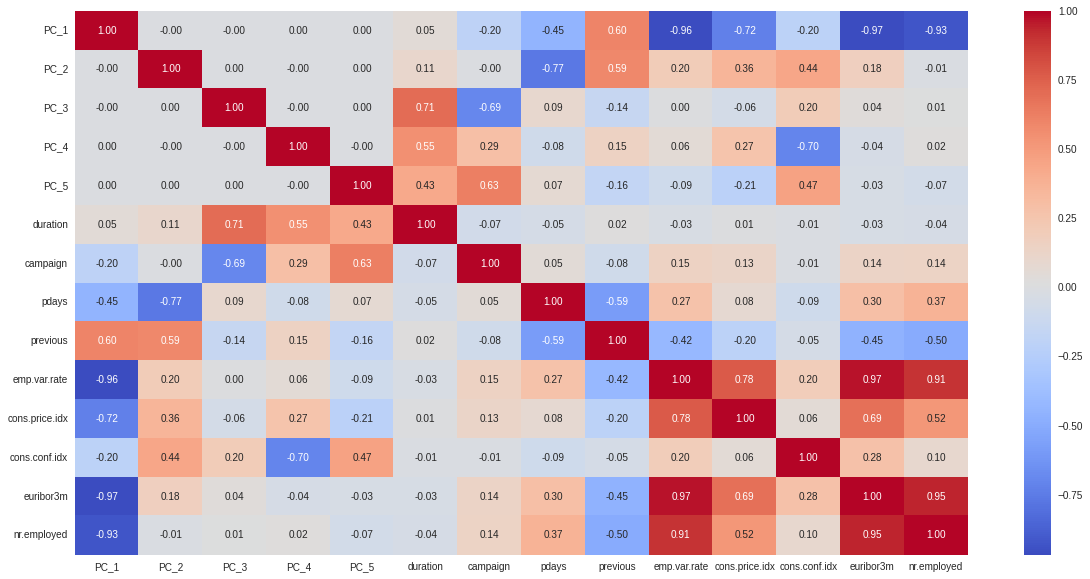

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_PC5.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")